# 그래디언트 부스팅

In [1]:
import pandas as pd
# 데이터 시각화
import matplotlib.pyplot as plt
import matplotlib
# export_graphviz : 나무 구조 생성 및 저장
from sklearn.tree import export_graphviz
# graphviz : 나무 구조 시각화 (.dot 확장자 파일 불러오기)
import graphviz

# 데이터 분할 : train, test
from sklearn.model_selection import train_test_split
# 예측/회귀 Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor
# 최적 모델, 파라미터 탐색
from sklearn.model_selection import GridSearchCV

In [2]:
df_raw = pd.read_csv('/home/pirl/Desktop/Statistics/Big Data Analyze/체질검사.csv', engine='python')
df_raw.head()

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
0,35.2,46,363.15,72.25,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4
1,11.8,27,168.00,71.25,38.1,93.0,79.1,94.5,57.3,36.2,24.5,29.0,30.0,18.8
2,22.2,69,177.75,68.50,38.7,102.0,95.0,98.3,55.0,38.3,21.8,30.8,25.7,18.8
3,10.6,57,147.75,65.75,35.2,99.6,86.4,90.1,53.0,35.0,21.3,31.7,27.3,16.9
4,47.5,51,219.00,64.00,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4


In [3]:
df_raw_y = df_raw['FAT']
df_raw_x = df_raw.drop('FAT', axis=1, inplace=False)

In [6]:
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y, test_size=0.3,
                                                               random_state=123)
print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("test data X size : {}".format(df_test_x.shape))
print("test data Y size : {}".format(df_test_y.shape))

train data X size : (176, 13)
train data Y size : (176,)
test data X size : (76, 13)
test data Y size : (76,)


In [7]:
# 모델 생성 : GradientBoostingRegressor
gb_uncustomized = GradientBoostingRegressor(random_state=1234)
gb_uncustomized.fit(df_train_x, df_train_y)
# Train 데이터 설명력
print("Score on training set : {:.3f}".format(gb_uncustomized.score(df_train_x, df_train_y)))
# Test 데이터 설명력
print("Score on test set : {:.3f}".format(gb_uncustomized.score(df_test_x, df_test_y)))

Score on training set : 0.979
Score on test set : 0.734


In [8]:
gb_uncustomized

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=1234, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [9]:
train_score=[]
test_score=[]
# n_estimators : 트리 수 변경(10~100)
para_n_tree = [n_tree * 10 for n_tree in range(1,11)]

for v_n_estimators in para_n_tree:
    gb = GradientBoostingRegressor(random_state=1234, n_estimators=v_n_estimators)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))
    
# 결과저장
df_score_n = pd.DataFrame()
df_score_n['Estimators'] = para_n_tree
df_score_n['TrainScore'] = train_score
df_score_n['TestScore']= test_score

In [10]:
# 모델 설명력 확인
df_score_n.round(3)

,Estimators,TrainScore,TestScore
0,10,0.683,0.604
1,20,0.823,0.708
2,30,0.877,0.734
3,40,0.908,0.733
4,50,0.931,0.730
5,60,0.946,0.732
6,70,0.958,0.733
7,80,0.968,0.733
8,90,0.974,0.733
9,100,0.979,0.734


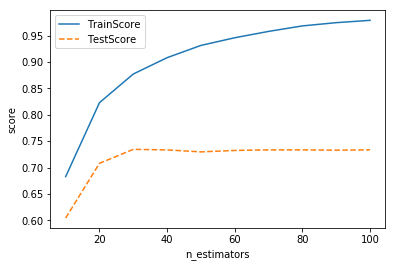

In [11]:
plt.plot(para_n_tree, train_score, linestyle='-', label='TrainScore')
plt.plot(para_n_tree, test_score, linestyle='--', label='TestScore')
plt.ylabel('score')
plt.xlabel('n_estimators')
plt.legend()

In [12]:
train_score=[]
test_score=[]
# min_samples_leaf : 잎사귀 최소 자료 수
para_leaf = [n_leaf for n_leaf in range(1,21)]

for v_min_samples_leaf in para_leaf:
    gb = GradientBoostingRegressor(random_state=1234, n_estimators=30,
                                  min_samples_leaf = v_min_samples_leaf)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))
    
# 결과저장
df_score_leaf = pd.DataFrame()
df_score_leaf['MinSamplesLeaf'] = para_leaf
df_score_leaf['TrainScore'] = train_score
df_score_leaf['TestScore']= test_score

In [13]:
# 모델 설명력 확인
df_score_leaf.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,1,0.877,0.734
1,2,0.878,0.741
2,3,0.875,0.728
3,4,0.872,0.733
4,5,0.874,0.740
5,6,0.863,0.724
6,7,0.855,0.713
7,8,0.854,0.723
8,9,0.856,0.722
9,10,0.850,0.727


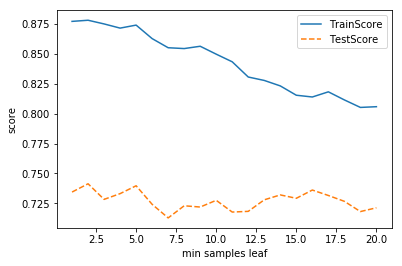

In [14]:
plt.plot(para_leaf, train_score, linestyle='-', label='TrainScore')
plt.plot(para_leaf, test_score, linestyle='--', label='TestScore')
plt.ylabel('score')
plt.xlabel('min samples leaf')
plt.legend()

In [15]:
train_score=[]
test_score=[]
# min_samples_split : 분할하기 위한 노드의 최소 자료 수
para_split = [n_split * 2 for n_split in range(16,30)]

for v_min_samples_split in para_split:
    gb = GradientBoostingRegressor(random_state=1234, n_estimators=30, min_samples_leaf=16,
                                  min_samples_split = v_min_samples_split)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))
    
# 결과저장
df_score_split = pd.DataFrame()
df_score_split['MinSamplesSplit'] = para_split
df_score_split['TrainScore'] = train_score
df_score_split['TestScore']= test_score

In [16]:
# 모델 설명력 확인
df_score_split.round(3)

,MinSamplesSplit,TrainScore,TestScore
0,32,0.814,0.736
1,34,0.812,0.729
2,36,0.810,0.729
3,38,0.810,0.729
4,40,0.809,0.724
5,42,0.809,0.724
6,44,0.802,0.725
7,46,0.798,0.726
8,48,0.789,0.726
9,50,0.792,0.730


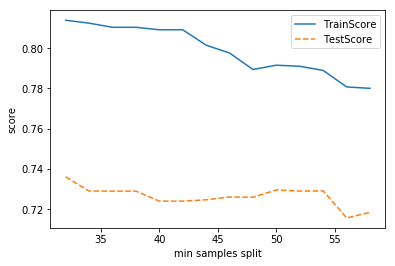

In [17]:
plt.plot(para_split, train_score, linestyle='-', label='TrainScore')
plt.plot(para_split, test_score, linestyle='--', label='TestScore')
plt.ylabel('score')
plt.xlabel('min samples split')
plt.legend()

In [25]:
train_score=[]
test_score=[]
# max_depth : 최대 깊이 변경
para_depth = [depth for depth in range(1,11)]

for v_max_depth in para_depth:
    gb = GradientBoostingRegressor(random_state=1234, n_estimators=30, min_samples_leaf=16, min_samples_split=54,
                                  max_depth = v_max_depth)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))
    
# 결과저장
df_score_depth = pd.DataFrame()
df_score_depth['Depth'] = para_depth
df_score_depth['TrainScore'] = train_score
df_score_depth['TestScore']= test_score

In [26]:
# 모델 설명력 확인
df_score_depth.round(3)

,Depth,TrainScore,TestScore
0,1,0.657,0.664
1,2,0.745,0.709
2,3,0.789,0.729
3,4,0.812,0.732
4,5,0.817,0.729
5,6,0.817,0.729
6,7,0.817,0.729
7,8,0.817,0.729
8,9,0.817,0.729
9,10,0.817,0.729


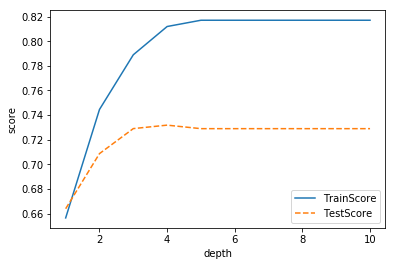

In [27]:
plt.plot(para_depth, train_score, linestyle='-', label='TrainScore')
plt.plot(para_depth, test_score, linestyle='--', label='TestScore')
plt.ylabel('score')
plt.xlabel('depth')
plt.legend()

In [29]:
train_score=[]
test_score=[]
# learning rate : 학습률 변경 0.1 ~ 0.9
para_lr = [lr * 0.1 for lr in range(1,10)]

for v_learning_rate in para_lr:
    gb = GradientBoostingRegressor(random_state=1234, n_estimators=30, min_samples_leaf=16, min_samples_split=54,
                                  max_depth=4, learning_rate =v_learning_rate)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))
    
# 결과저장
df_score_lr = pd.DataFrame()
df_score_lr['LearningRate'] = para_lr
df_score_lr['TrainScore'] = train_score
df_score_lr['TestScore']= test_score

In [30]:
# 모델 설명력 확인
df_score_lr.round(3)

,LearningRate,TrainScore,TestScore
0,0.1,0.812,0.732
1,0.2,0.882,0.756
2,0.3,0.919,0.741
3,0.4,0.936,0.733
4,0.5,0.952,0.713
5,0.6,0.963,0.682
6,0.7,0.967,0.675
7,0.8,0.970,0.670
8,0.9,0.976,0.644


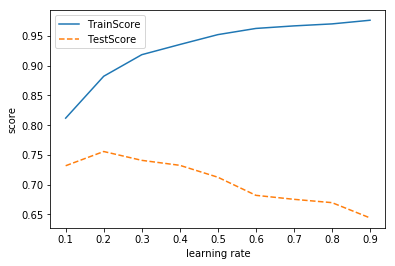

In [32]:
plt.plot(para_lr, train_score, linestyle='-', label='TrainScore')
plt.plot(para_lr, test_score, linestyle='--', label='TestScore')
plt.ylabel('score')
plt.xlabel('learning rate')
plt.legend()

In [38]:
gb_final = GradientBoostingRegressor(random_state=1234, n_estimators=30, min_samples_leaf=16,
                                    min_samples_split=54, max_depth=5, learning_rate=0.1)
gb_final.fit(df_train_x, df_train_y)

# Train 데이터 설명력
print("Score on training set : {:.3f}".format(gb_final.score(df_train_x, df_train_y)))
# Test 데이터 설명력
print("Score on test set : {:.3f}".format(gb_final.score(df_test_x, df_test_y)))

Score on training set : 0.817
Score on test set : 0.729


## 실습

In [44]:
# 다중공선성 확인
from statsmodels.stats.outliers_influence import variance_inflation_factor
# 선형회귀모형
from sklearn.linear_model import LinearRegression
# 회귀분석
from statsmodels.formula.api import ols
# 정규성, 절편 만들기
from statsmodels.api import qqplot, add_constant
# 선형 모델 formula(y ~ X1 + X2 + ....)
import statsmodels.formula.api as smf

In [41]:
df_diabetes = pd.read_csv('/home/pirl/Desktop/Statistics/Big Data Analyze/DIABETES.csv', engine='python')
df_diabetes.head()

,Y,AGE,GENDER,BMI,BP,CHOLESTEROL,LDL,HDL,TCH,LTG,GLUCOSE
0,151,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87
1,75,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69
2,141,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85
3,206,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89
4,135,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80


In [51]:
reg_model = smf.ols(formula = "Y ~ C(GENDER) + BMI + BP + CHOLESTEROL + TCH + LTG",
                    data=df_diabetes)
# 적합
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.513
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     76.51
Date:                Thu, 18 Jul 2019   Prob (F-statistic):           5.71e-65
Time:                        10:27:27   Log-Likelihood:                -2388.0
No. Observations:                 442   AIC:                             4790.
Df Residuals:                     435   BIC:                             4819.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       -301.4446     27.139    -11.

In [156]:
df_diabetes_y = df_diabetes['Y']
df_diabetes_x = df_diabetes[['GENDER', 'BMI', 'BP', 'CHOLESTEROL', 'TCH', 'LTG']]

df_diabetes_x.head()

,GENDER,BMI,BP,CHOLESTEROL,TCH,LTG
0,2,32.1,101.0,157,4.0,4.8598
1,1,21.6,87.0,183,3.0,3.8918
2,2,30.5,93.0,156,4.0,4.6728
3,1,25.3,84.0,198,5.0,4.8903
4,1,23.0,101.0,192,4.0,4.2905


In [157]:
dfd_train_x, dfd_test_x, dfd_train_y, dfd_test_y = train_test_split(df_diabetes_x, df_diabetes_y, test_size=0.3,
                                                               random_state=123)
print("train data X size : {}".format(dfd_train_x.shape))
print("train data Y size : {}".format(dfd_train_y.shape))
print("test data X size : {}".format(dfd_test_x.shape))
print("test data Y size : {}".format(dfd_test_y.shape))

train data X size : (309, 6)
train data Y size : (309,)
test data X size : (133, 6)
test data Y size : (133,)


In [158]:
# 모델 생성 : GradientBoostingRegressor
gb_uncustomized = GradientBoostingRegressor(random_state=1234)
gb_uncustomized.fit(dfd_train_x, dfd_train_y)
# Train 데이터 설명력
print("Score on training set : {:.3f}".format(gb_uncustomized.score(dfd_train_x, dfd_train_y)))
# Test 데이터 설명력
print("Score on test set : {:.3f}".format(gb_uncustomized.score(dfd_test_x, dfd_test_y)))

Score on training set : 0.827
Score on test set : 0.432


In [159]:
train_score=[]
test_score=[]
# n_estimators : 트리 수 변경(10~100)
para_n_tree = [n_tree * 10 for n_tree in range(1,11)]

for v_n_estimators in para_n_tree:
    gb = GradientBoostingRegressor(random_state=1234, n_estimators=v_n_estimators)
    gb.fit(dfd_train_x, dfd_train_y)
    train_score.append(gb.score(dfd_train_x, dfd_train_y))
    test_score.append(gb.score(dfd_test_x, dfd_test_y))
    
# 결과저장
df_score_n = pd.DataFrame()
df_score_n['Estimators'] = para_n_tree
df_score_n['TrainScore'] = train_score
df_score_n['TestScore']= test_score

In [160]:
df_score_n.round(3)

,Estimators,TrainScore,TestScore
0,10,0.507,0.362
1,20,0.629,0.413
2,30,0.683,0.425
3,40,0.725,0.426
4,50,0.750,0.432
5,60,0.770,0.438
6,70,0.786,0.435
7,80,0.800,0.433
8,90,0.817,0.432
9,100,0.827,0.432


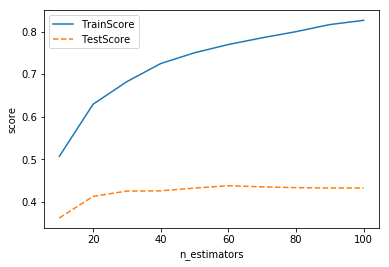

In [161]:
plt.plot(para_n_tree, train_score, linestyle='-', label='TrainScore')
plt.plot(para_n_tree, test_score, linestyle='--', label='TestScore')
plt.ylabel('score')
plt.xlabel('n_estimators')
plt.legend()

In [162]:
train_score=[]
test_score=[]
# min_samples_leaf : 잎사귀 최소 자료 수
para_leaf = [n_leaf for n_leaf in range(1,21)]

for v_min_samples_leaf in para_leaf:
    gb = GradientBoostingRegressor(random_state=1234, n_estimators=30,
                                  min_samples_leaf = v_min_samples_leaf)
    gb.fit(dfd_train_x, dfd_train_y)
    train_score.append(gb.score(dfd_train_x, dfd_train_y))
    test_score.append(gb.score(dfd_test_x, dfd_test_y))
    
# 결과저장
df_score_leaf = pd.DataFrame()
df_score_leaf['MinSamplesLeaf'] = para_leaf
df_score_leaf['TrainScore'] = train_score
df_score_leaf['TestScore']= test_score

In [163]:
df_score_leaf.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,1,0.683,0.425
1,2,0.677,0.431
2,3,0.678,0.439
3,4,0.664,0.444
4,5,0.668,0.446
5,6,0.665,0.444
6,7,0.664,0.440
7,8,0.662,0.443
8,9,0.667,0.448
9,10,0.666,0.459


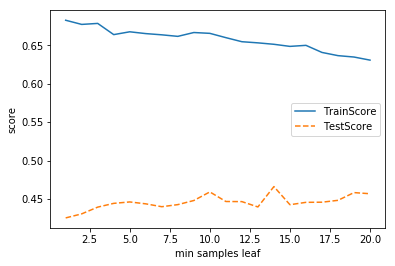

In [164]:
plt.plot(para_leaf, train_score, linestyle='-', label='TrainScore')
plt.plot(para_leaf, test_score, linestyle='--', label='TestScore')
plt.ylabel('score')
plt.xlabel('min samples leaf')
plt.legend()

In [165]:
train_score=[]
test_score=[]
# min_samples_split : 분할하기 위한 노드의 최소 자료 수
para_split = [n_split * 2 for n_split in range(14,30)]

for v_min_samples_split in para_split:
    gb = GradientBoostingRegressor(random_state=1234, n_estimators=30, min_samples_leaf=14,
                                  min_samples_split = v_min_samples_split)
    gb.fit(dfd_train_x, dfd_train_y)
    train_score.append(gb.score(dfd_train_x, dfd_train_y))
    test_score.append(gb.score(dfd_test_x, dfd_test_y))
    
# 결과저장
df_score_split = pd.DataFrame()
df_score_split['MinSamplesSplit'] = para_split
df_score_split['TrainScore'] = train_score
df_score_split['TestScore']= test_score

In [166]:
df_score_split.round(3)

,MinSamplesSplit,TrainScore,TestScore
0,28,0.651,0.466
1,30,0.647,0.442
2,32,0.648,0.447
3,34,0.648,0.454
4,36,0.644,0.462
5,38,0.644,0.462
6,40,0.644,0.455
7,42,0.644,0.455
8,44,0.639,0.453
9,46,0.639,0.453


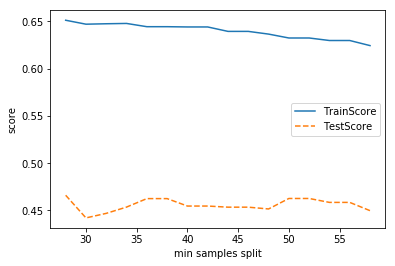

In [167]:
plt.plot(para_split, train_score, linestyle='-', label='TrainScore')
plt.plot(para_split, test_score, linestyle='--', label='TestScore')
plt.ylabel('score')
plt.xlabel('min samples split')
plt.legend()

In [168]:
train_score=[]
test_score=[]
# max_depth : 최대 깊이 변경
para_depth = [depth for depth in range(1,11)]

for v_max_depth in para_depth:
    gb = GradientBoostingRegressor(random_state=1234, n_estimators=30, min_samples_leaf=14, min_samples_split=36,
                                  max_depth = v_max_depth)
    gb.fit(dfd_train_x, dfd_train_y)
    train_score.append(gb.score(dfd_train_x, dfd_train_y))
    test_score.append(gb.score(dfd_test_x, dfd_test_y))
    
# 결과저장
df_score_depth = pd.DataFrame()
df_score_depth['Depth'] = para_depth
df_score_depth['TrainScore'] = train_score
df_score_depth['TestScore']= test_score

In [169]:
df_score_depth.round(3)

,Depth,TrainScore,TestScore
0,1,0.496,0.430
1,2,0.572,0.449
2,3,0.644,0.462
3,4,0.682,0.454
4,5,0.722,0.439
5,6,0.737,0.424
6,7,0.740,0.433
7,8,0.748,0.426
8,9,0.748,0.427
9,10,0.748,0.428


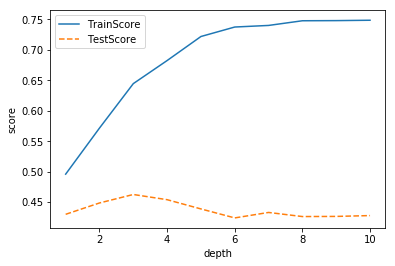

In [170]:
plt.plot(para_depth, train_score, linestyle='-', label='TrainScore')
plt.plot(para_depth, test_score, linestyle='--', label='TestScore')
plt.ylabel('score')
plt.xlabel('depth')
plt.legend()

In [171]:
train_score=[]
test_score=[]
# learning rate : 학습률 변경 0.1 ~ 0.9
para_lr = [lr * 0.1 for lr in range(1,10)]

for v_learning_rate in para_lr:
    gb = GradientBoostingRegressor(random_state=1234, n_estimators=30, min_samples_leaf=14, min_samples_split=36,
                                  max_depth=3, learning_rate =v_learning_rate)
    gb.fit(dfd_train_x, dfd_train_y)
    train_score.append(gb.score(dfd_train_x, dfd_train_y))
    test_score.append(gb.score(dfd_test_x, dfd_test_y))
    
# 결과저장
df_score_lr = pd.DataFrame()
df_score_lr['LearningRate'] = para_lr
df_score_lr['TrainScore'] = train_score
df_score_lr['TestScore']= test_score

In [172]:
df_score_lr.round(3)

,LearningRate,TrainScore,TestScore
0,0.1,0.644,0.462
1,0.2,0.714,0.439
2,0.3,0.759,0.407
3,0.4,0.782,0.374
4,0.5,0.789,0.362
5,0.6,0.815,0.307
6,0.7,0.847,0.243
7,0.8,0.853,0.310
8,0.9,0.836,0.152


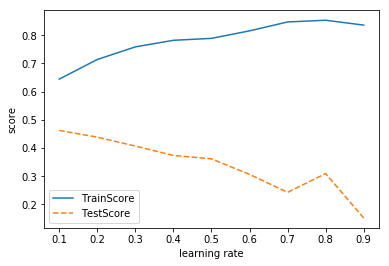

In [173]:
plt.plot(para_lr, train_score, linestyle='-', label='TrainScore')
plt.plot(para_lr, test_score, linestyle='--', label='TestScore')
plt.ylabel('score')
plt.xlabel('learning rate')
plt.legend()

In [174]:
gb_final = GradientBoostingRegressor(random_state=1234, n_estimators=30, min_samples_leaf=14,
                                    min_samples_split=36, max_depth=4, learning_rate=0.1)
gb_final.fit(dfd_train_x, dfd_train_y)

# Train 데이터 설명력
print("Score on training set : {:.3f}".format(gb_final.score(dfd_train_x, dfd_train_y)))
# Test 데이터 설명력
print("Score on test set : {:.3f}".format(gb_final.score(dfd_test_x, dfd_test_y)))

Score on training set : 0.682
Score on test set : 0.454
